In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps
%matplotlib inline

In [5]:
un_emp  = pd.read_csv('Unemployment in India.csv')

In [6]:
un_emp.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
un_emp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
un_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
un_emp.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
un_emp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
un_emp = un_emp.dropna()

In [12]:
un_emp.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
un_emp = un_emp.fillna(un_emp.mean())


/var/folders/kr/m0q3q8q90qs4x__jz90d9cgh0000gn/T/ipykernel_1292/669305773.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  un_emp = un_emp.fillna(un_emp.mean())


In [20]:
un_emp = un_emp.drop_duplicates(['Region', ' Date'])

In [21]:
un_emp.shape

(385, 7)

In [22]:
un_emp.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
668,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban
736,Uttarakhand,31-03-2020,Monthly,8.15,889245.0,33.33,Urban


In [23]:
un_emp.rename(columns={'Region': 'State'}, inplace=True)

In [24]:
un_emp.tail(2)

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
668,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban
736,Uttarakhand,31-03-2020,Monthly,8.15,889245.0,33.33,Urban


In [54]:
average_unemployment_rate = un_emp.groupby('State')[' Estimated Unemployment Rate (%)'].mean()

In [55]:
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [56]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Tripura
Highest unemployment rate: 27.166428571428572


In [57]:

# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [58]:
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 2.4750000000000005


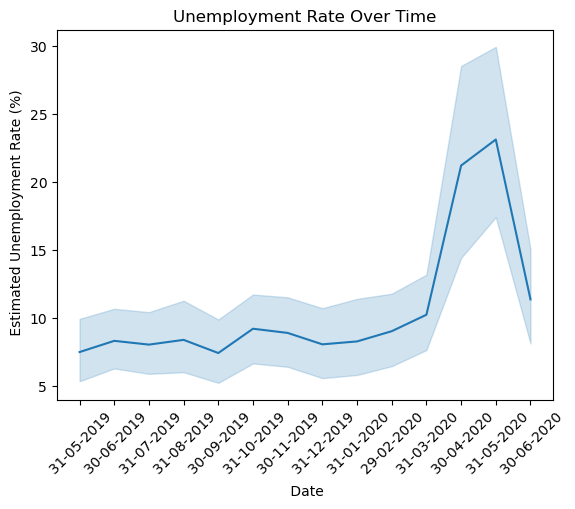

In [59]:
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=un_emp)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

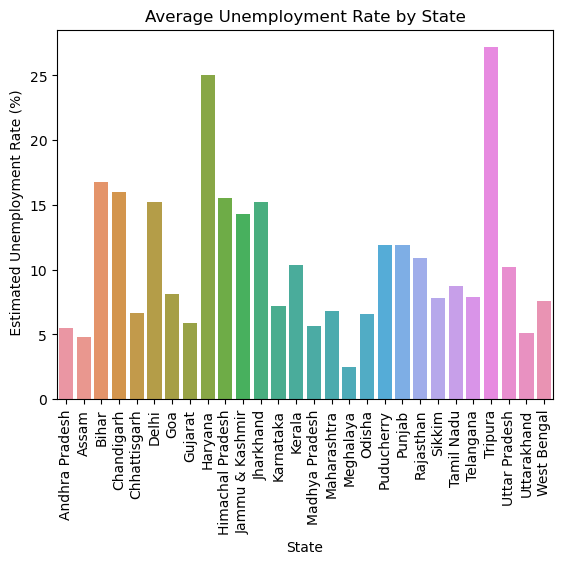

In [61]:
state_avg_unemployment = un_emp.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y=' Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

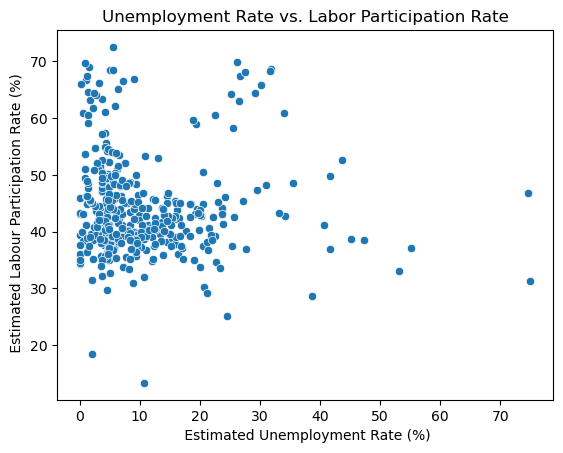

In [64]:
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=un_emp)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

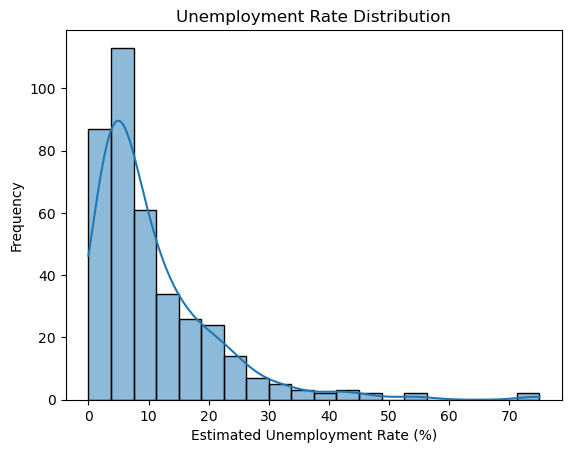

In [67]:
sns.histplot(un_emp[' Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

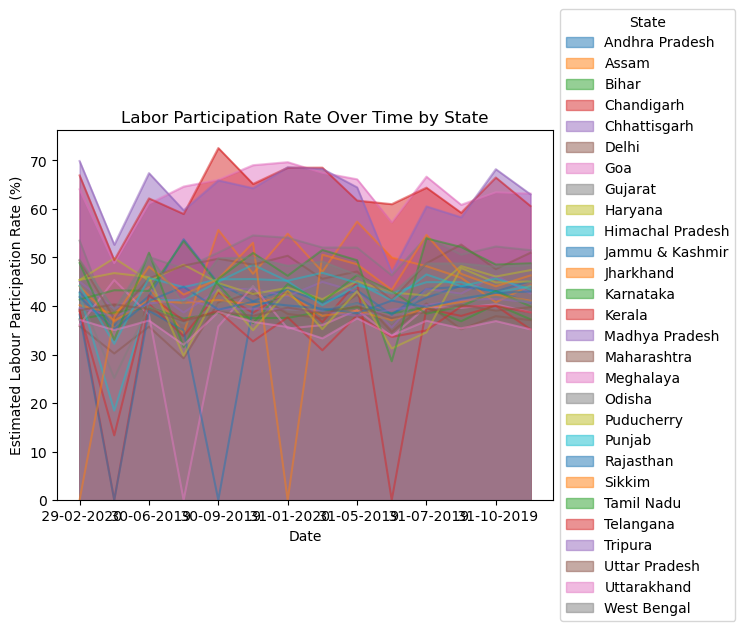

In [75]:
state_area_labor_participation = un_emp.pivot(index=' Date', columns='State', values=' Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

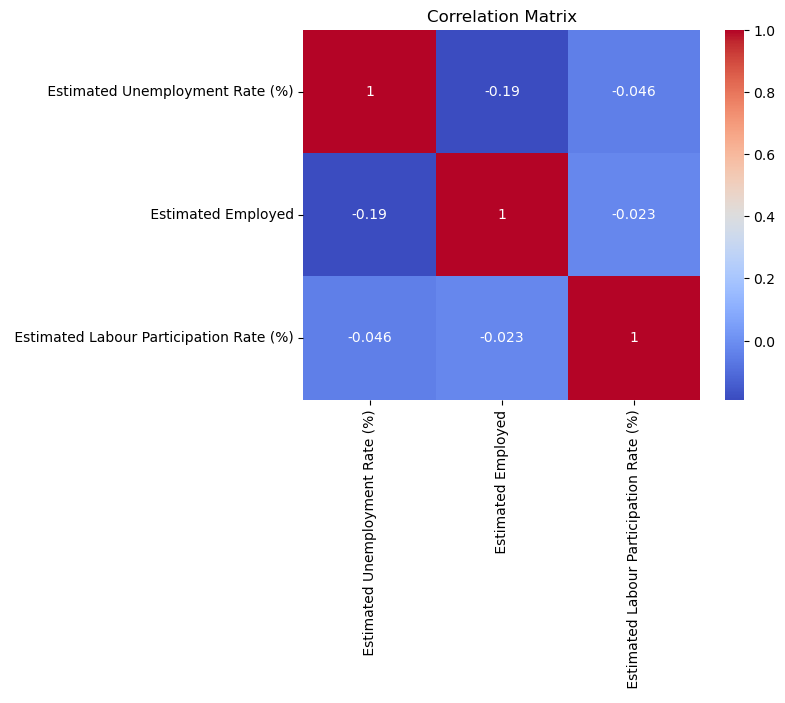

In [89]:
correlation_matrix = un_emp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

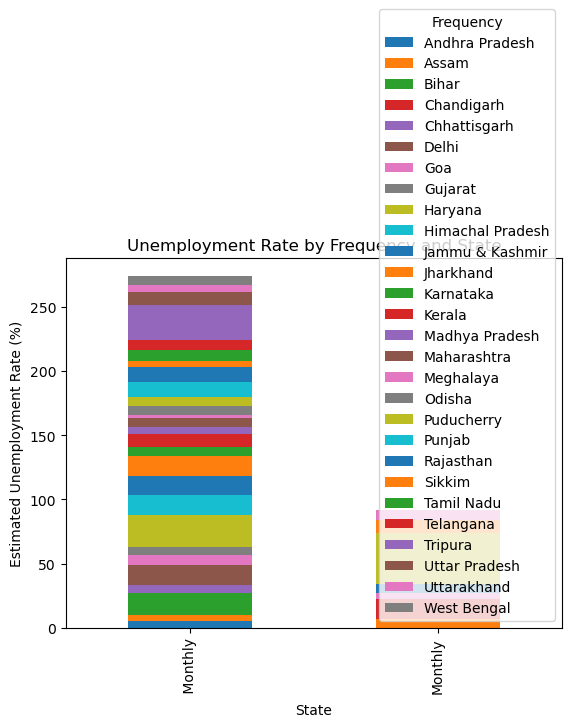

In [93]:
freq_state_unemployment = un_emp.groupby([' Frequency', 'State'])[' Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()

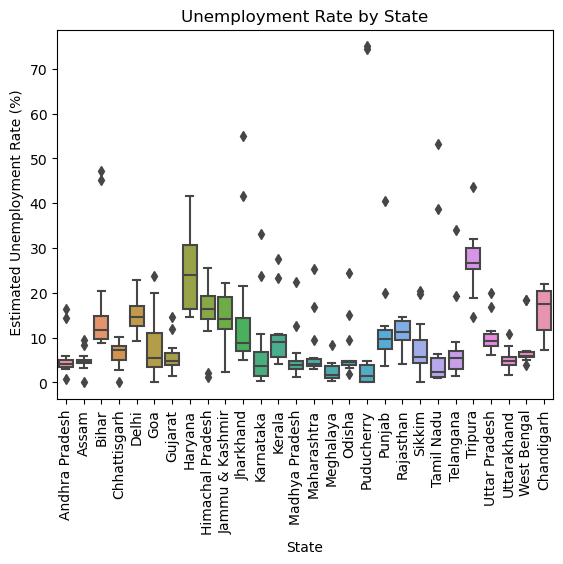

In [95]:
sns.boxplot(x='State', y=' Estimated Unemployment Rate (%)', data=un_emp)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()